In [1]:
import pandas as pd 
import numpy as np
import os      
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
path="C:/Users/Yusuke/Dropbox/Georgia_tech/GT_KIDS/Results/"
Folder_name="Processtime_dynamic_twoport_simulationtime_300s_ver4/"     # First of all, you need to select the folder name !!!!

In [2]:
def Get_Latency(df_algo_time):
    print(df_algo_time.describe())
    sns.set()
    df_algo_time.hist()
    plt.xlabel("Time(s)")
    plt.ylabel("Frequency")
    return df_algo_time.mean()
    
def Get_aggregation(KID1_table, KID3_table, KID7_table, KID9_table, KID11_table,):
    aggre=pd.concat([KID1_table, KID3_table, KID7_table, KID9_table, KID11_table])
    aggre=aggre.sort_index()
    print(aggre.describe())
    aggre.hist()
    return aggre
    
def Get_DetailsOfKID(KID_table):
    sns.set()
    KID_table.plot()
    KID_table.hist()
    print(KID_table.describe())
    
def Get_Elapsed_time(KID_table):
    elapsed_time=[]
    for i in range(len(KID_table)):
        time=KID_table.index[i]-KID_table.index[0]
        elapsed_time.append(time)
    return elapsed_time

def __datetime(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')

def EpTget(KID_table_datetime):
    
    ElapsedTime=[]
    for i in range(len(KID_table_datetime.index)):
        tmp=__datetime(KID_table_datetime.index[i]) - __datetime(KID_table_datetime.index[0])
        ElapsedTime.append(tmp.total_seconds())
    return ElapsedTime

def Get_allKID(Ipt_Kid1, Ipt_Kid3, Ipt_Kid7, Ipt_Kid9, Ipt_Kid11, column_name):
    a=Ipt_Kid1[column_name]
    a.name=column_name+'_KID1'
    b=Ipt_Kid3[column_name]
    b.name=column_name+'_KID3'
    c=Ipt_Kid7[column_name]
    c.name=column_name+'_KID7'
    d=Ipt_Kid9[column_name]
    d.name=column_name+'_KID9'
    e=Ipt_Kid11[column_name]
    e.name=column_name+'_KID11'
    imash=pd.concat([a,b,c,d,e], axis=1).sort_index()
    imash_itp=imash.interpolate()
    return imash_itp

def MakeElapsedTable(Table):
    ELT=pd.concat([Table.reset_index(), pd.DataFrame(EpTget(Table), columns=['Elapsed time (s)'])], axis=1)
    ELT=ELT.set_index('Elapsed time (s)')
    return ELT

# Reading Data

In [3]:
KID1_table_RR=pd.read_pickle(path+Folder_name+"KID1_RR.pkl")
KID3_table_RR=pd.read_pickle(path+Folder_name+"KID3_RR.pkl")
KID7_table_RR=pd.read_pickle(path+Folder_name+"KID7_RR.pkl")
KID9_table_RR=pd.read_pickle(path+Folder_name+"KID9_RR.pkl")
KID11_table_RR=pd.read_pickle(path+Folder_name+"KID11_RR.pkl")
df_algo_time_RR=pd.read_pickle(path+Folder_name+"df_algo_time_RR.pkl")
KID1_serve_time_RR=pd.read_pickle(path+Folder_name+"KID1_serve_time_RR.pkl")
KID3_serve_time_RR=pd.read_pickle(path+Folder_name+"KID3_serve_time_RR.pkl")
KID7_serve_time_RR=pd.read_pickle(path+Folder_name+"KID7_serve_time_RR.pkl")
KID9_serve_time_RR=pd.read_pickle(path+Folder_name+"KID9_serve_time_RR.pkl")
KID11_serve_time_RR=pd.read_pickle(path+Folder_name+"KID11_serve_time_RR.pkl")

KID1_table_CPUbased=pd.read_pickle(path+Folder_name+"KID1_CPUbased.pkl")
KID3_table_CPUbased=pd.read_pickle(path+Folder_name+"KID3_CPUbased.pkl")
KID7_table_CPUbased=pd.read_pickle(path+Folder_name+"KID7_CPUbased.pkl")
KID9_table_CPUbased=pd.read_pickle(path+Folder_name+"KID9_CPUbased.pkl")
KID11_table_CPUbased=pd.read_pickle(path+Folder_name+"KID11_CPUbased.pkl")
df_algo_time_CPUbased=pd.read_pickle(path+Folder_name+"df_algo_time_CPUbased.pkl")
KID1_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID1_serve_time_CPUbased.pkl")
KID3_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID3_serve_time_CPUbased.pkl")
KID7_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID7_serve_time_CPUbased.pkl")
KID9_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID9_serve_time_CPUbased.pkl")
KID11_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID11_serve_time_CPUbased.pkl")

KID1_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID1_Thermalbased.pkl")
KID3_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID3_Thermalbased.pkl")
KID7_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID7_Thermalbased.pkl")
KID9_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID9_Thermalbased.pkl")
KID11_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID11_Thermalbased.pkl")
df_algo_time_Thermalbased=pd.read_pickle(path+Folder_name+"df_algo_time_Thermalbased.pkl")
KID1_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID1_serve_time_Thermalbased.pkl")
KID3_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID3_serve_time_Thermalbased.pkl")
KID7_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID7_serve_time_Thermalbased.pkl")
KID9_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID9_serve_time_Thermalbased.pkl")
KID11_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID11_serve_time_Thermalbased.pkl")

# Each KID servers detail 

            FAN(%)           PS  CPU_utilization  CPU_temperature(degC)
count  1028.000000  1022.000000      1027.000000            1030.000000
mean     34.089732    19.105186         6.649435              63.791100
std      17.271146    25.564960         6.065364               4.634165
min      18.820000     0.100000         0.500000              56.333333
25%      24.698500     4.854167         1.580000              60.590278
50%      26.660000     7.577381         6.180000              63.416667
75%      36.850000    20.925000        10.620000              66.000000
max      77.620000   100.000000        21.690000              76.083333


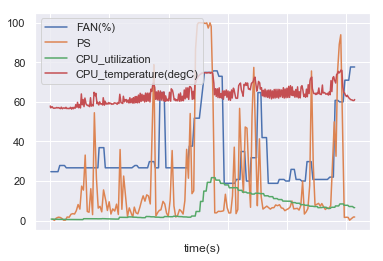

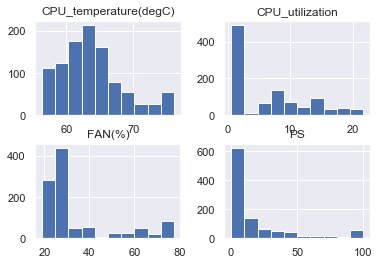

In [4]:
Get_DetailsOfKID(KID1_table_CPUbased)

# Resampling

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



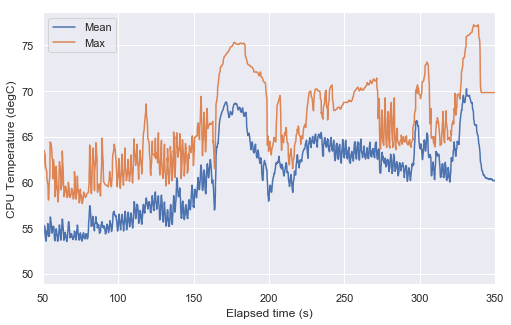

In [5]:
sns.set()
RR=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
RR.mean(axis=1).plot(label="Mean")
RR.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.xlim(50, 350)
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



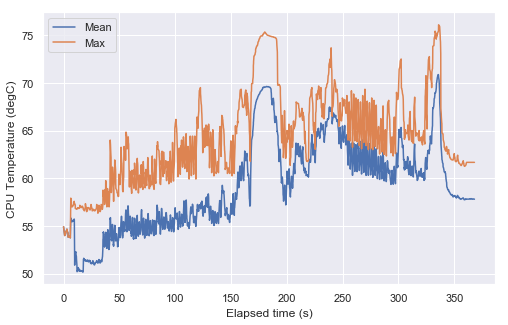

In [6]:
CPU_based=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
CPU_based.mean(axis=1).plot(label="Mean")
CPU_based.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



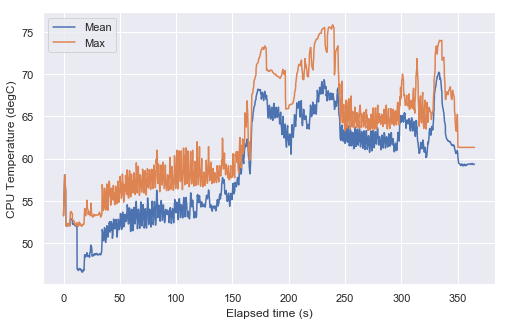

In [7]:
Thermal_based=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
Thermal_based.mean(axis=1).plot(label="Mean")
Thermal_based.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.legend()

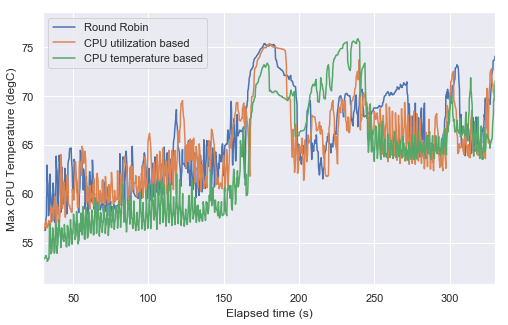

In [29]:
plt.figure(figsize=(8.1, 5))
RR.max(axis=1).plot(label="Round Robin")
CPU_based.max(axis=1).plot(label="CPU utilization based")
Thermal_based.max(axis=1).plot(label="CPU temperature based")
plt.ylabel("Max CPU Temperature (degC)")
plt.xlim(30, 330)
plt.legend()

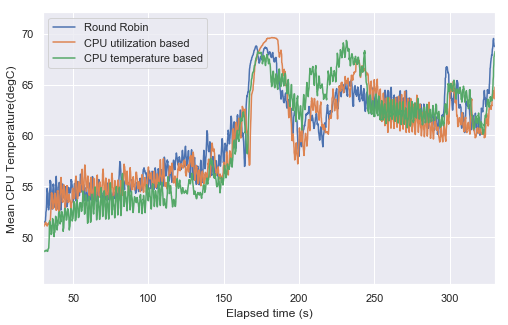

In [30]:
plt.figure(figsize=(8.1, 5))
RR.mean(axis=1).plot(label="Round Robin")
CPU_based.mean(axis=1).plot(label="CPU utilization based")
Thermal_based.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Mean CPU Temperature(degC)")
plt.xlim(30, 330)
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



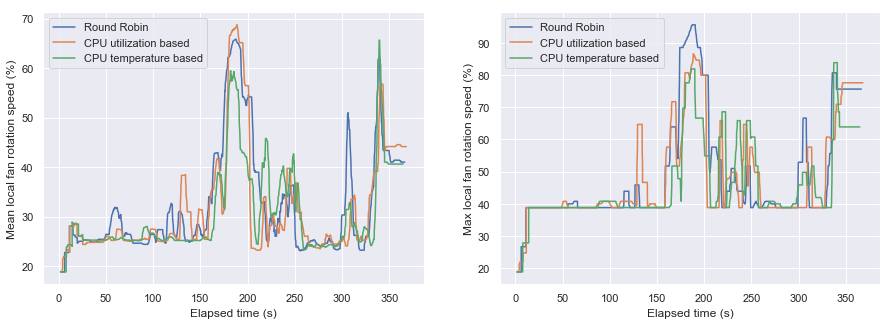

In [10]:
RR_fan=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'FAN(%)'))
CPU_based_fan=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'FAN(%)'))
Thermal_based_fan=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'FAN(%)'))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
RR_fan.mean(axis=1).plot(label="Round Robin")
CPU_based_fan.mean(axis=1).plot(label="CPU utilization based")
Thermal_based_fan.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Mean local fan rotation speed (%)")
plt.legend()

plt.subplot(1, 2, 2)
RR_fan.max(axis=1).plot(label="Round Robin")
CPU_based_fan.max(axis=1).plot(label="CPU utilization based")
Thermal_based_fan.max(axis=1).plot(label="CPU temperature based")
plt.ylabel("Max local fan rotation speed (%)")
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



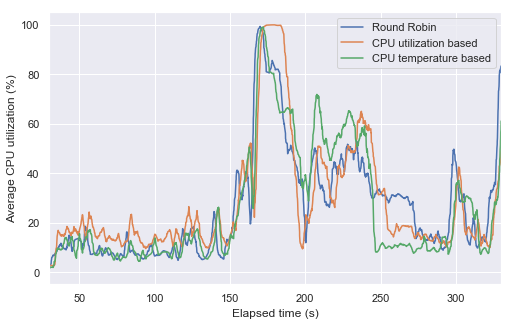

In [31]:
RR_ps=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'PS'))
CPU_based_ps=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'PS'))
Thermal_based_ps=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'PS'))

plt.figure(figsize=(8.1, 5))
RR_ps.mean(axis=1).plot(label="Round Robin")
CPU_based_ps.mean(axis=1).plot(label="CPU utilization based")
Thermal_based_ps.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Average CPU utilization (%)")
plt.xlim(30, 330)
plt.legend()

# Round Robin Histgram

          Latency
count  299.000000
mean     1.001520
std      0.000605
min      1.000301
25%      1.001220
50%      1.001263
75%      1.001587
max      1.004786


Latency    1.00152
dtype: float64

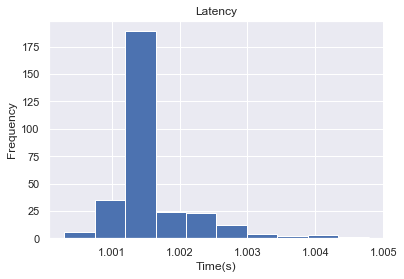

In [12]:
Get_Latency(df_algo_time_RR)

            FAN(%)           PS  CPU_utilization  CPU_temperature(degC)
count  5089.000000  5060.000000      5084.000000            5099.000000
mean     31.254131    23.745850         8.032625              59.496029
std      14.706031    29.667478         8.982147               7.244631
min      18.820000     0.000000         0.140000              39.500000
25%      19.990000     3.742857         1.770000              56.489583
50%      25.870000    11.858333         4.680000              59.833333
75%      38.810000    26.100000        10.630000              63.784722
max      95.650000   100.000000        46.210000              77.250000


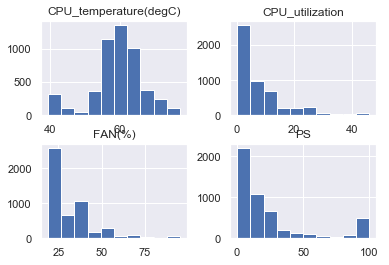

In [13]:
RR_hist=Get_aggregation(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR)

# CPU utilization based 

          Latency
count  299.000000
mean     1.001933
std      0.001451
min      1.000597
25%      1.001429
50%      1.001503
75%      1.002029
max      1.017191


Latency    1.001933
dtype: float64

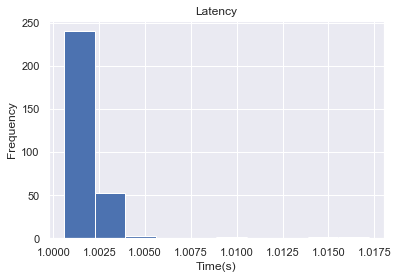

In [14]:
Get_Latency(df_algo_time_CPUbased)

            FAN(%)           PS  CPU_utilization  CPU_temperature(degC)
count  5144.000000  5114.000000      5139.000000            5154.000000
mean     30.685109    25.739656         7.163749              59.446660
std      14.796441    27.754686         6.209193               7.156840
min      18.820000     0.100000         0.220000              39.833333
25%      19.990000     8.300000         1.737500              56.105903
50%      22.740000    15.600000         6.040000              60.395833
75%      38.810000    28.000000        11.635833              63.765625
max      86.630000   100.000000        27.050000              76.083333


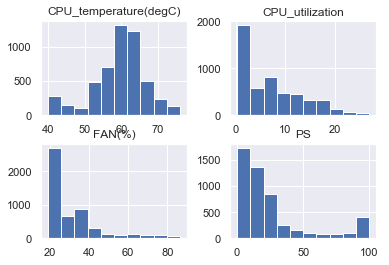

In [15]:
CPU_based_hist=Get_aggregation(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased)

# Thermal based 

          Latency
count  299.000000
mean     1.001766
std      0.000949
min      1.000531
25%      1.001423
50%      1.001476
75%      1.001826
max      1.014220


Latency    1.001766
dtype: float64

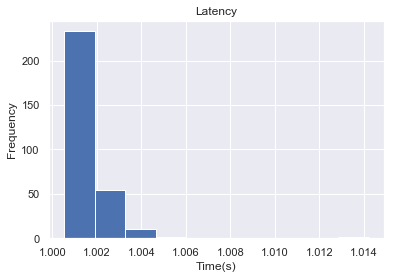

In [16]:
Get_Latency(df_algo_time_Thermalbased)

            FAN(%)           PS  CPU_utilization  CPU_temperature(degC)
count  4959.000000  4938.000000      4963.000000            4975.000000
mean     29.758348    23.518874         8.719468              59.224782
std      13.008242    30.726770        11.339157               6.967832
min      18.820000     0.200000         0.000000              35.750000
25%      19.990000     2.661667         1.140000              55.541667
50%      22.740000    11.166667         5.210000              59.854167
75%      38.810000    24.445833        10.670000              63.774306
max      83.890000   100.000000        59.870000              75.833333


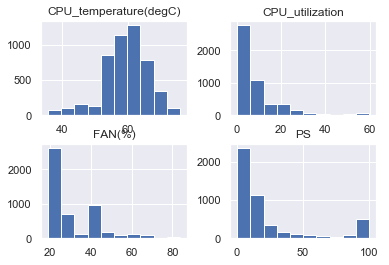

In [17]:
Thermal_based_hist=Get_aggregation(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased)

In [18]:
print(RR_hist.describe(), "\n", CPU_based_hist.describe(),"\n", Thermal_based_hist.describe())

            FAN(%)           PS  CPU_utilization  CPU_temperature(degC)
count  5089.000000  5060.000000      5084.000000            5099.000000
mean     31.254131    23.745850         8.032625              59.496029
std      14.706031    29.667478         8.982147               7.244631
min      18.820000     0.000000         0.140000              39.500000
25%      19.990000     3.742857         1.770000              56.489583
50%      25.870000    11.858333         4.680000              59.833333
75%      38.810000    26.100000        10.630000              63.784722
max      95.650000   100.000000        46.210000              77.250000 
             FAN(%)           PS  CPU_utilization  CPU_temperature(degC)
count  5144.000000  5114.000000      5139.000000            5154.000000
mean     30.685109    25.739656         7.163749              59.446660
std      14.796441    27.754686         6.209193               7.156840
min      18.820000     0.100000         0.220000              

In [37]:
table_mean=pd.DataFrame({'Round Robin':RR_hist.mean(), 
               'CPU utilization based':CPU_based_hist.mean(), 
              'CPU temperature based':Thermal_based_hist.mean()})
table_mean.rename(index={'FAN (%)':'Average local fan rotation speed (%)', 'PS':'Average CPU utilization (%)', 
                         'CPU_utilization':'Average system load', 'CPU_temperature(degC)':'Average CPU temperature (degC)'})


,Round Robin,CPU utilization based,CPU temperature based
FAN(%),31.254131,30.685109,29.758348
Average CPU utilization (%),23.745850,25.739656,23.518874
Average system load,8.032625,7.163749,8.719468
Average CPU temperature (degC),59.496029,59.446660,59.224782


In [38]:
table_std=pd.DataFrame({'Round Robin':RR_hist.std(), 
               'CPU utilization based':CPU_based_hist.std(), 
              'CPU temperature based':Thermal_based_hist.std()})
table_std.rename(index={'FAN (%)':'Standard deviation of local fan rotation speed (%)', 'PS':'Standard deviation of average CPU utilization (%)', 
                         'CPU_utilization':'Standard deviation of average system load', 'CPU_temperature(degC)':'Standard deviation of average CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
FAN(%),14.706031,14.796441,13.008242
Standard deviation of average CPU utilization (%),29.667478,27.754686,30.726770
Standard deviation of average system load,8.982147,6.209193,11.339157
Standard deviation of average CPU temperature (degC),7.244631,7.156840,6.967832


In [39]:
table_max=pd.DataFrame({'Round Robin':RR_hist.max(), 
               'CPU utilization based':CPU_based_hist.max(), 
              'CPU temperature based':Thermal_based_hist.max()})
table_max.rename(index={'FAN (%)':'Max local fan rotation speed (%)', 'PS':'Max CPU utilization (%)', 
                         'CPU_utilization':'Max system load', 'CPU_temperature(degC)':'Max CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
FAN(%),95.65,86.630000,83.890000
Max CPU utilization (%),100.00,100.000000,100.000000
Max system load,46.21,27.050000,59.870000
Max CPU temperature (degC),77.25,76.083333,75.833333


# Histgram evaluation

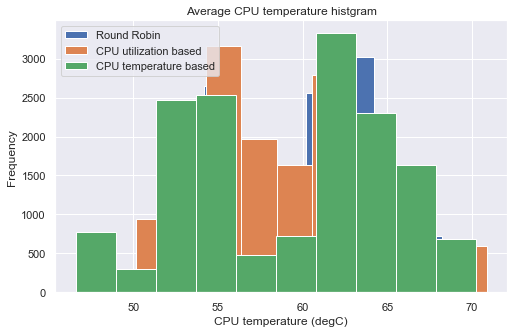

In [19]:
# For mean
hoge=pd.concat([RR.mean(axis=1), CPU_based.mean(axis=1), Thermal_based.mean(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
# Golden ration 1:1.618
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Average CPU temperature histgram")
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()

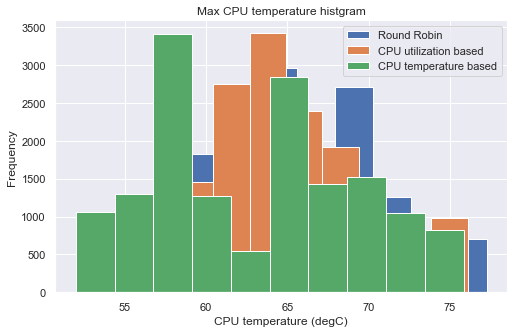

In [20]:
# For max
hoge=pd.concat([RR.max(axis=1), CPU_based.max(axis=1), Thermal_based.max(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Max CPU temperature histgram")
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()

In [21]:
print(len(RR_hist), len(CPU_based_hist), len(Thermal_based_hist))

5099 5154 4975


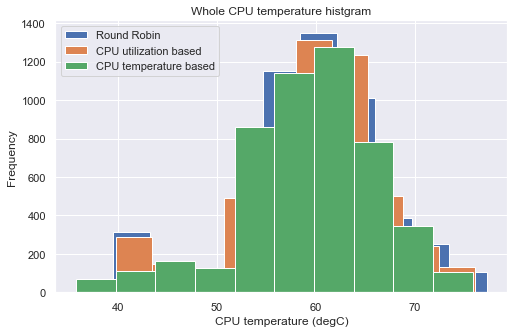

In [22]:
# For all 
""" The problem is that each method has different frequency"""
plt.figure(figsize=(8.1, 5))
RR_hist['CPU_temperature(degC)'].hist(label="Round Robin")
CPU_based_hist['CPU_temperature(degC)'].hist(label="CPU utilization based")
Thermal_based_hist['CPU_temperature(degC)'].hist(label="CPU temperature based")
plt.title("Whole CPU temperature histgram")
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()

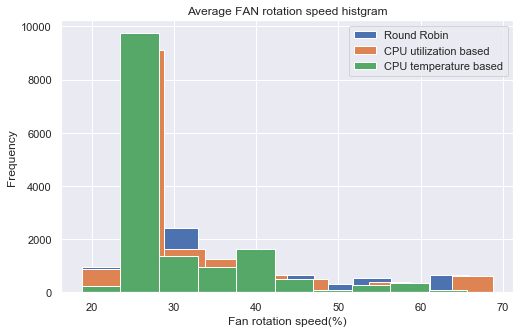

In [23]:
# For mean
hoge=pd.concat([RR_fan.mean(axis=1), CPU_based_fan.mean(axis=1), Thermal_based_fan.mean(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Average FAN rotation speed histgram")
plt.xlabel("Fan rotation speed(%)")
plt.ylabel("Frequency")
plt.legend()

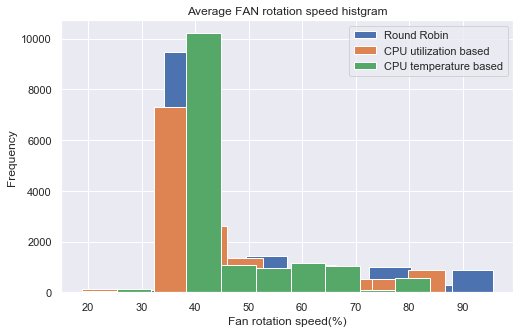

In [24]:
# For max
hoge=pd.concat([RR_fan.max(axis=1), CPU_based_fan.max(axis=1), Thermal_based_fan.max(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Average FAN rotation speed histgram")
plt.xlabel("Fan rotation speed(%)")
plt.ylabel("Frequency")
plt.legend()

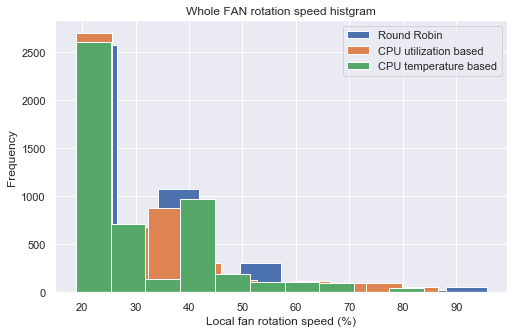

In [32]:
# For all 
""" The problem is that each method has different frequency"""
plt.figure(figsize=(8.1, 5))
RR_hist['FAN(%)'].hist(label="Round Robin")
CPU_based_hist['FAN(%)'].hist(label="CPU utilization based")
Thermal_based_hist['FAN(%)'].hist(label="CPU temperature based")
plt.title("Whole FAN rotation speed histgram")
plt.xlabel("Local fan rotation speed (%)")
plt.ylabel("Frequency")
plt.legend()

# Server Process time evaluation

       Server Processing time
count              750.000000
mean                 1.700813
std                  3.344922
min                  0.000021
25%                  0.494385
50%                  0.684901
75%                  1.135084
max                 35.715841


,Server Processing time
0,1.174571
0,0.581332
0,0.755770
0,0.554328
0,0.454932
1,0.923243
1,0.481005
1,0.806273
1,0.650441
1,0.450440


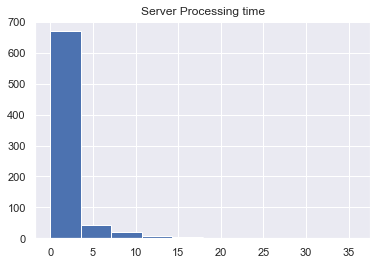

In [25]:
Get_aggregation(KID1_serve_time_RR, KID3_serve_time_RR, KID7_serve_time_RR, KID9_serve_time_RR, KID11_serve_time_RR)

       Server Processing time
count              750.000000
mean                 1.276075
std                  2.141590
min                  0.000018
25%                  0.496621
50%                  0.668700
75%                  1.082914
max                 21.970143


,Server Processing time
0,0.437583
0,0.633009
0,0.559676
0,0.636643
0,0.610488
1,0.450873
1,0.831034
1,0.908027
1,0.577673
1,0.447524


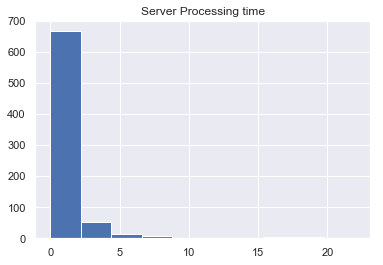

In [26]:
Get_aggregation(KID1_serve_time_CPUbased, KID3_serve_time_CPUbased, KID7_serve_time_CPUbased, KID9_serve_time_CPUbased, KID11_serve_time_CPUbased)

       Server Processing time
count              750.000000
mean                 1.731114
std                  3.726788
min                  0.000022
25%                  0.490554
50%                  0.670779
75%                  1.152035
max                 43.788364


,Server Processing time
0,0.620486
0,1.172476
0,0.659491
0,0.594928
0,0.458937
1,0.879584
1,0.447293
1,0.664569
1,0.470576
1,0.456646


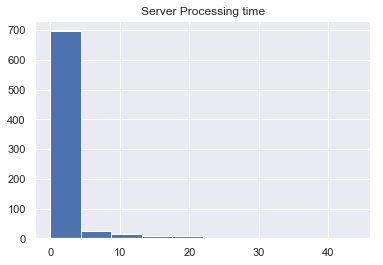

In [27]:
Get_aggregation(KID1_serve_time_Thermalbased, KID3_serve_time_Thermalbased, KID7_serve_time_Thermalbased, KID9_serve_time_Thermalbased, KID11_serve_time_Thermalbased)

In [35]:
df_servetime=pd.DataFrame({'Round Robin':
                 pd.concat([KID1_serve_time_RR, KID3_serve_time_RR, KID7_serve_time_RR, KID9_serve_time_RR, KID11_serve_time_RR]).mean(),
                 'CPU Utilization based':
                 pd.concat([KID1_serve_time_CPUbased, KID3_serve_time_CPUbased, KID7_serve_time_CPUbased, KID9_serve_time_CPUbased, KID11_serve_time_CPUbased]).mean(),
                 'CPU temperature based':
                 pd.concat([KID1_serve_time_Thermalbased, KID3_serve_time_Thermalbased, KID7_serve_time_Thermalbased, KID9_serve_time_Thermalbased, KID11_serve_time_Thermalbased]).mean()
                })

df_algotime=pd.DataFrame({'Round Robin':
                 df_algo_time_RR.mean()-1,
                 'CPU Utilization based':
                 df_algo_time_CPUbased.mean()-1,
                 'CPU temperature based':
                 df_algo_time_Thermalbased.mean()-1
                })
table_time=pd.concat([df_algotime, df_servetime])
#table_time.index.names=['Average algorithm latency time (s)', 'Average server processing time (s)']
table_time.rename(index={'Latency':'Average queueing latency time (s)', 'Server Processing time':'Average server processing time (s)'})

,Round Robin,CPU Utilization based,CPU temperature based
Average queueing latency time (s),0.001520,0.001933,0.001766
Average server processing time (s),1.700813,1.276075,1.731114
